In [95]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [156]:
urls = {'year':[],'url':[]}

for year in range(1980,2024):
    url = f'https://www.procyclingstats.com/statistics.php?season={year}&level=1&mw=1&filter=Filter&p=teams&s=youngest-teams'
    urls['year'] += [year]
    urls['url'] += [url]

In [157]:
urls

{'year': [1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2023],
 'url': ['https://www.procyclingstats.com/statistics.php?season=1980&level=1&mw=1&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1981&level=1&mw=1&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1982&level=1&mw=1&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1983&level=1&mw=1&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?season=1984&level=1&mw=1&filter=Filter&p=teams&s=youngest-teams',
  'https://www.procyclingstats.com/statistics.php?se

In [158]:
df_list = list()

for item in urls['url']:
    page = requests.get(item)
    data = pd.read_html(page.text)[0]
    df_list.append(data)
    
len(df_list)

44

In [159]:
df = pd.concat(df_list)

In [160]:
df.Season.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            1393 non-null   int64  
 1   Season       1393 non-null   int64  
 2   Team         1393 non-null   object 
 3   Class        590 non-null    object 
 4   Average age  1393 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 65.3+ KB


In [162]:
df = df.drop(columns=['#']).rename(columns={'Average age':'avg_age'})

In [179]:
df.tail(10)

,Season,Team,Class,avg_age
8,2023,Intermarché - Circus - Wanty,WT,27.2
9,2023,Trek - Segafredo,WT,27.3
10,2023,UAE Team Emirates,WT,27.5
11,2023,Team Jayco AlUla,WT,27.5
12,2023,Movistar Team,WT,27.6
13,2023,Soudal - Quick Step,WT,27.8
14,2023,Bahrain - Victorious,WT,27.8
15,2023,Jumbo-Visma,WT,27.9
16,2023,Astana Qazaqstan Team,WT,28.0
17,2023,Cofidis,WT,28.5


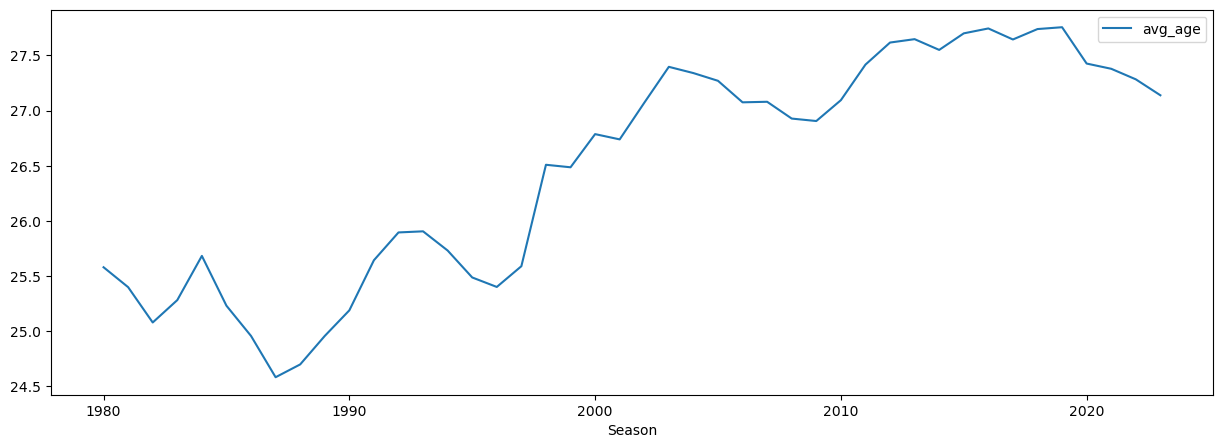

In [164]:
average_df = df.groupby('Season').agg({'avg_age':'mean'})

average_df.plot(kind='line',figsize=(15,5))
plt.show()

In [169]:
average_df[30:]

,avg_age
Season,
2010,27.094444
2011,27.416667
2012,27.616667
2013,27.647368
2014,27.550000
2015,27.700000
2016,27.744444
2017,27.644444
2018,27.738889


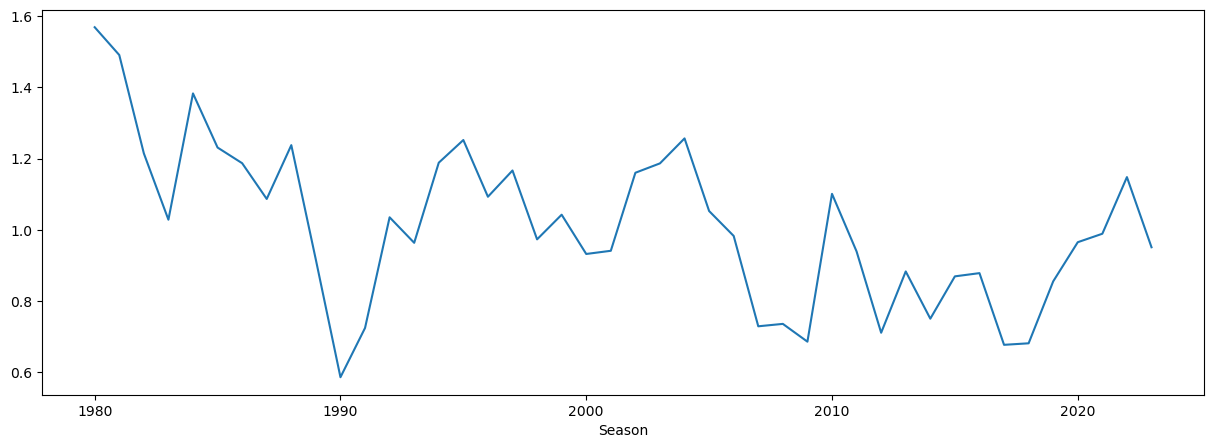

In [171]:
std_df = df.groupby(by=['Season'])['avg_age'].std()

std_df.plot(kind='line',figsize=(15,5))
plt.show()

In [175]:
df['avg_age'].max()

31.7

In [184]:
df.query('1997 < Season < 1999')

,Season,Team,Class,avg_age
0,1998,Banesto,TT1,25.3
1,1998,Rabobank ProTeam,TT1,25.4
2,1998,Polti,NaN,25.4
3,1998,Vitalicio Seguros,NaN,25.5
4,1998,La Française des Jeux,TT1,25.6
5,1998,Kelme - Costa Blanca,TT1,25.7
6,1998,Riso Scotti - MG,TT1,25.7
7,1998,GAN,NaN,25.8
8,1998,Asics - CGA,TT1,26.0
9,1998,Cofidis,TT1,26.0
